In [16]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.constants import speed_of_light, elementary_charge, electron_mass, hbar as hbar_SI
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [17]:
me_SI = electron_mass
e_SI = elementary_charge
c_SI = speed_of_light

meV = e_SI * 1e-3
nm = 1e-9
ps = 1e-12

c = c_SI * ps / nm
hbar = hbar_SI / (meV * ps)
m = me_SI * c_SI ** 2 / meV / c ** 2

In [18]:
omega = 2 / hbar
vQD = 15

In [19]:
x_min, x_max = -50, 150
x0 = 0
x1 = 75

t1 = 2
t2 = t1 + (x1 - x0) / vQD

t_min, t_max = 0, 20
Nx, Nt = 5000, 5000

In [20]:
x_values = np.linspace(x_min, x_max, Nx)
t_values = np.linspace(t_min, t_max, Nt)

dx = x_values[1] - x_values[0]
dt = t_values[1] - t_values[0]

laplacian = sp.diags([1, -2, 1], offsets=[-1, 0, 1], shape=(Nx, Nx), format='csc') / dx ** 2
H_kinetic = - (hbar ** 2 / (2 * m)) * laplacian

In [6]:
V = 0.5 * m * omega ** 2 * x_values ** 2

In [7]:
H = H_kinetic + sp.diags(V, format="csc")

In [8]:
w, v = eigsh(H, k=4, which="SA")

In [9]:
psi0_in = v[:, 0]

In [10]:
psi0_in /= np.sqrt(np.sum(np.abs(psi0_in) ** 2) * dx)

In [11]:
psi0 = psi0_in

In [12]:
psi0

array([9.94879486e-17, 1.47836010e-16, 3.00833344e-16, ...,
       7.51663256e-16, 4.81998031e-16, 3.08322544e-16], shape=(5000,))

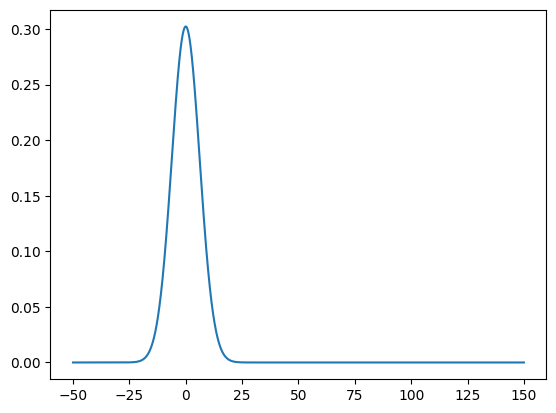

In [13]:
plt.plot(x_values, psi0)

In [14]:
def ground_state(x):
	A = (m * omega / (np.pi * hbar)) ** 0.25
	alpha = (m * omega) / (2.0 * hbar)
	return A * np.exp(-alpha * (x ** 2))

In [15]:
psi = ground_state(x_values)
norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
psi /= norm

In [16]:
psi

array([1.70572208e-015, 1.79763464e-015, 1.89442030e-015, ...,
       2.39937013e-129, 2.04982970e-129, 1.75113678e-129], shape=(5000,))

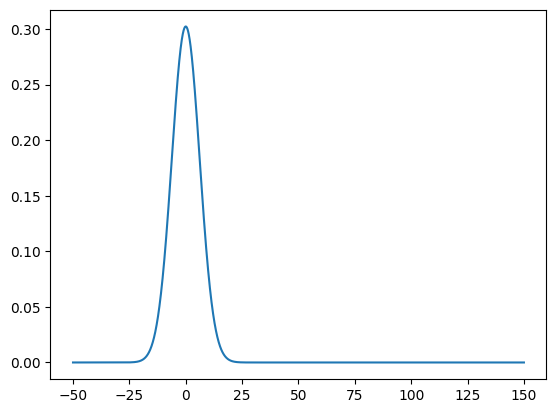

In [17]:
plt.plot(x_values, psi)

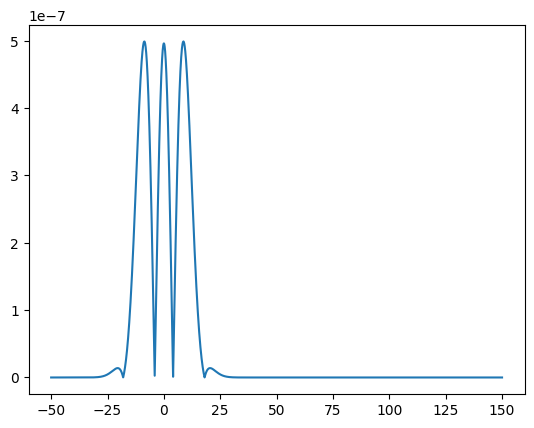

In [18]:
plt.plot(x_values, abs(psi - psi0))

## Complex potential

In [21]:
m = m * 0.98 
omega = 1.5193													# from matlab reference pdf in box
alpha_ent_barr = 0.4900									# from 2019Yamahata paper			#		(meV / V)
alpha_ent_exit_barr = 0.0370						# paper												#   (meV / V)
alpha_exit_barr = 0.4800								# paper												#		(meV / V)
alpha_exit_ent_bar = 0.0520							# paper												#		(meV / V)
V_ent = -0.7000		#V										# paper
V_exit = -0.7000	#V										# paper
V_amp = 1.4150		#V?											# matlab reference
f = 4e9															# matlab reference
x_ent = 0		#nm													# paper
x_exit = 100	#nm												# paper
U_scr = 1		#meV												# paper
L_ent = 100	#nm													# matlab reference
L_exit = 100 #nm												# matlab reference
L_scr = 1 #nm														# paper

In [7]:
m

0.0055719175014944085

In [22]:
def theta(arr):
  return np.array([1 if x > 0 else 0 for x in arr]) 

In [23]:
def V_ac(t):
  return V_amp * np.cos(2 * np.pi * f * t *1e12)

In [24]:
def U_ent(x, t):
  A = -alpha_ent_barr * (V_ent + V_ac(t))
  B = (alpha_ent_barr / alpha_ent_exit_barr) ** (-np.abs(x - x_ent) / np.abs(x_exit - x_ent))
  return A * B

In [25]:
def U_exit(x):
  A = -alpha_exit_barr * V_exit
  B = (alpha_exit_barr / alpha_exit_ent_bar) ** (-np.abs(x - x_exit) / np.abs(x_exit - x_ent))
  return A * B

In [30]:
def U_upper(x):
  A = U_scr * np.exp(-((x - x_ent) / L_scr) * theta(x - x_ent)) * np.exp(-((x_ent - L_ent - x) / L_scr) * theta(x_ent - L_ent - x))
  B = U_scr * np.exp(-((x - x_exit - L_exit) / L_scr) * theta(x - x_exit - L_exit)) * np.exp(-((x_exit - x) / L_scr) * theta(x_exit - x))
  return A + B

In [31]:
def U(x, t):
  return U_ent(x, t) + U_exit(x) + U_upper(x)

In [35]:
V = U(x_values, 0)

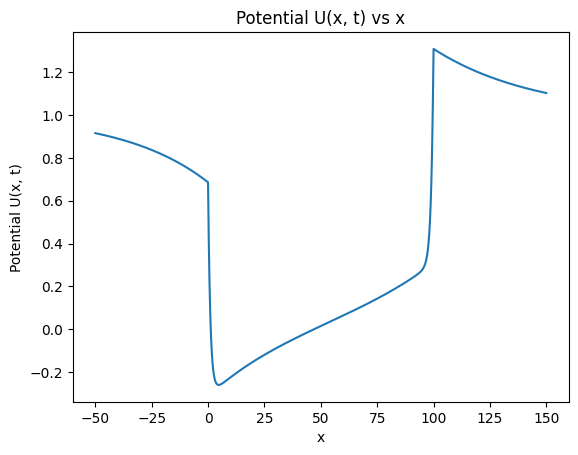

In [36]:
plt.plot(x_values, V)
plt.title("Potential U(x, t) vs x")
plt.xlabel("x")
plt.ylabel("Potential U(x, t)")
plt.show()

In [28]:
laplacian = sp.diags([1, -2, 1], offsets=[-1, 0, 1], shape=(Nx, Nx), format='csc') / dx ** 2
H_kinetic = - (hbar ** 2 / (2 * m)) * laplacian

In [29]:
H = H_kinetic + sp.diags(V, format="csc")

In [30]:
w, v = eigsh(H, k=1, which="SA")

ArpackNoConvergence: ARPACK error -1: No convergence (50001 iterations, 0/1 eigenvectors converged)

In [ ]:
psi0_in = v[:, 0]

In [ ]:
psi0_in /= np.sqrt(np.sum(np.abs(psi0_in) ** 2) * dx)

In [ ]:
psi0 = psi0_in

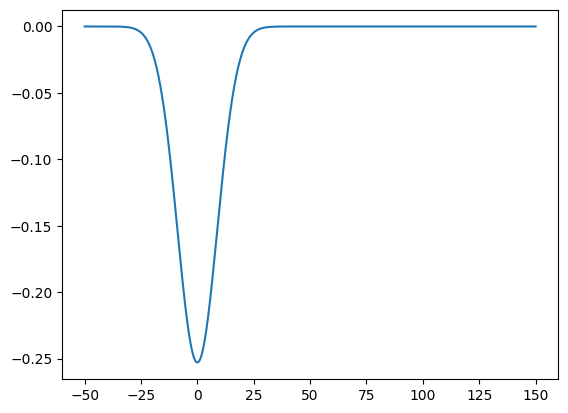

In [ ]:
plt.plot(x_values, psi0)